# Solar heating model 4

The following two cells show the MATLAB/Octave code of the solar heating model after
- placing the entire integration of the model in a separate M-file function `run_model.m` and
- calling this function from the M-file script `solar_heating4.m` just after setting the model parameters.

You can run the resulting version 4 of the solar heating model by executing the following cells, or you can copy and paste the code to two M-files `run_model.m` and `solar_heating4.m` that you can run in GNU Octave by executing the main program `solar_heating4`.

In [1]:
%%file run_model.m

function run_model(pureWaterFreezingPoint, pureWaterBoilingPoint, ...
    deltaT, startTime, nTimeSteps, fileName, ...
    solarConstant, effectiveHeatCapacity, initialTemperature)
% RUN_MODEL Direct model integration.
% RUN_MODEL directs the integration of the zero-dimensional solar heating model.

% Author:           Andre Paul
% Written:          2011-11-30
% Last updated:     2019-10-31
%
% Dependencies:     none
%
% It is assumed that all run parameters, model parameters and initial
% conditions were set and all output files were opened prior to the call to 
% this M-file function.

% Set initial conditions
myTime      = startTime;
temperature = initialTemperature;

% Open output file
fileID = fopen(fileName, 'w');

% Write header of output file
fprintf(fileID, '%% Zero-dimensional global solar heating model\n');
fprintf(fileID, '%% Column 1: time/a\n');
fprintf(fileID, '%% Column 2: global annual-mean surface temperature/degC\n');
fprintf(fileID, '%10.4f %10.4f\n', myTime/(86400.0*365.0), ...
                                   temperature - pureWaterFreezingPoint);

% Time loop (myIter = iteration counter)
for myIter=1:nTimeSteps
    
    % Record simulated time
    myTime = myTime + deltaT;
    
    % Step global annual-mean surface temperature forward in time 
    % (by "Euler forward" or "forward-in-time" method)
    temperature  = temperature + deltaT/effectiveHeatCapacity* ...
                                 (solarConstant/4.0);
                                 
    % Limit temperature to the boiling point
    if temperature > pureWaterBoilingPoint
        temperature = pureWaterBoilingPoint;
    end
    
    % Write current time and temperature to output file
    fprintf(fileID, '%10.4f %10.4f\n', myTime/(86400.0*365.0), ...
                                       temperature - pureWaterFreezingPoint);
    
end % end of time loop

% Close output file
fclose(fileID);

Created file '/Users/andre/Development/intro-to-octave/run_model.m'.


In [2]:
% SOLAR_HEATING4 Zero-dimensional (global) solar heating model.
% SOLAR_HEATING4 is an example of how to solve a first-order ordinary
% differential equation numerically: It calculates the global annual-mean
% surface temperature as a function time, assuming that there is no other
% energy flux than the average flux of solar energy incident on Earth.

% Version 4 calls an M-file function.
%
% Author:           Andre Paul
% Written:          2016-10-27
% Last updated:     2019-10-31
%
% Execution:        solar_heating4
% Dependencies:     run_model
%
% >> solar_heating4

% Set physical constants
pureWaterFreezingPoint  = 273.15;  % pure water freezing point/K
pureWaterBoilingPoint   = 373.15;  % pure water boiling point/K

% Set run parameters
deltaT     =    5.0*86400.0;       % time step/s
startTime  =    0.0;               % time to start integration/s
nTimeSteps =  365;                 % total number of time steps
fileName   = "results.txt";        % output file name

% Set model parameters
solarConstant         = 1360.8;    % solar constant of Earth/(W m-2)
effectiveHeatCapacity = 2.9526E08; % effective heat capacity of the 
                                   % atmosphere-ocean system/(J m-2 K-1)
initialTemperature    = 15.0 + pureWaterFreezingPoint; % initial temperature/K

% Run model
run_model(pureWaterFreezingPoint, pureWaterBoilingPoint, ...
          deltaT, startTime, nTimeSteps, fileName, ...
          solarConstant, effectiveHeatCapacity, ...
          initialTemperature);

To visualize the results in a plot, we can make use of the same code (or M-file script `plot_results.m`) as before:

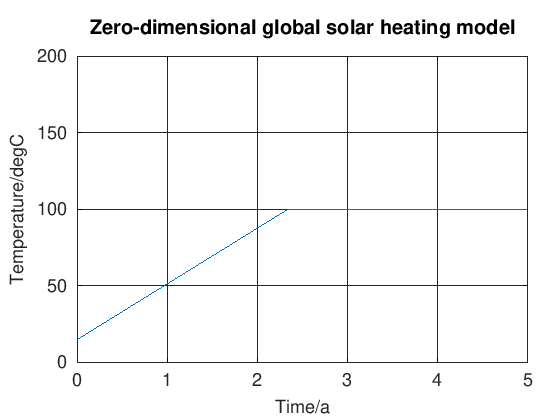

In [3]:
% PLOT_RESULTS Plot data from a text file.
% PLOT_RESULTS is a simple example of how to load some model results from a
% text file and plot it.

% Author:           Andre Paul
% Written:          2014-10-16
% Last updated:     2016-10-28
%
% Execution:        plot_results
% Dependencies:     none
%
% >> plot_results

% Open text file and load data
filename    = 'results.txt';
data        = load(filename);
time        = data(:, 1); % column 1: time/a
temperature = data(:, 2); % column 2: temperature/degC

% Plot the global annual-mean surface temperature as a function of time
figure
plot(time, temperature, 'LineWidth', 2);

% Display axes grid lines
grid on

% Set the plot limits
ylim([0 200])

% Set the font size of the tick labels of the current axes
% ("gca" returns the handle to the current axes for the current figure)
set(gca, 'FontSize', 18)

% Make the labels
xlabel('Time/a', 'FontSize', 18)
ylabel('Temperature/degC', 'FontSize', 18)
title('Zero-dimensional global solar heating model', ...
      'FontSize', 20)

## Next section
Now proceed with [Structure arrays](octave_structure_arrays.ipynb).